DateTime    0
Junction    0
Vehicles    0
ID          0
dtype: int64


C:\Users\nh013\AppData\Local\Temp\ipykernel_9564\2604138492.py:32: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean = df.mean()


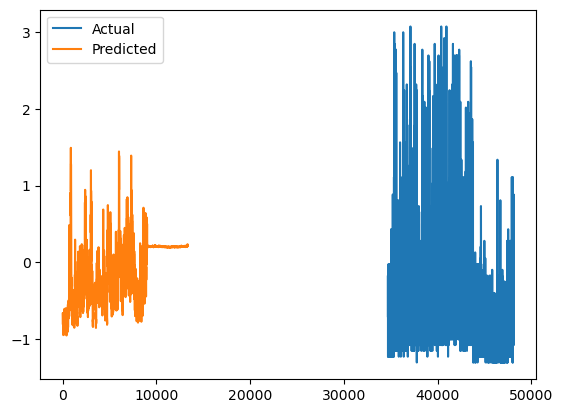

44474


In [3]:
#use (SVR) SUPPORT verctor regression
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

# Function to handle outliers
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df


# Load the dataset
df = pd.read_csv(r'C:\Users\nh013\Desktop\traffic control.csv\traffic.csv')

# Feature selection
df = df[['DateTime','Junction','Vehicles','ID']]

# Identify missing values
print(df.isnull().sum())

# Drop rows with missing values
df.dropna(inplace=True)

# Fill missing values with mean or median
mean = df.mean()
df.fillna(mean, inplace=True)

# Fill missing values with mode
mode = df.mode().iloc[0]
df.fillna(mode, inplace=True)

# Fill missing values with forward fill
df.fillna(method='ffill', inplace=True)

# Fill missing values with backward fill
df.fillna(method='bfill', inplace=True)


# One-hot encode categorical variable 'Junction'
df = pd.get_dummies(df, columns=['Junction'])

# Handle outliers
df = handle_outliers(df, 'Vehicles')

# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Data transformation
scaler = MinMaxScaler()
df[['Vehicles']] = scaler.fit_transform(df[['Vehicles']])

# Normalize and scale all numerical columns
scaler = StandardScaler()
num_cols = df.select_dtypes(include='number').columns
df[num_cols] = scaler.fit_transform(df[num_cols])

# Calculate rolling mean and standard deviation for 'Vehicles' column
df['Average_rolling_mean'] = df['Vehicles'].rolling(window=30).mean()
df['Average_rolling_std'] = df['Vehicles'].rolling(window=30).std()

# Drop rows with NaN values after calculating rolling mean and std
df.dropna(inplace=True)

# Split dataset into features and target variable
X = df.drop(['DateTime', 'ID', 'Vehicles'], axis=1)
y = df['Vehicles']

# Split dataset into training and testing set
train_size = int(0.7 * len(df))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Initialize SVR model
model = SVR()

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Plot actual vs predicted values as a smooth line graph
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()

# Print the number of rows in the cleaned and transformed dataframe
print(df.shape[0])


DateTime    0
Junction    0
Vehicles    0
ID          0
dtype: int64


C:\Users\nh013\AppData\Local\Temp\ipykernel_9564\1651971118.py:22: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean = df.mean()


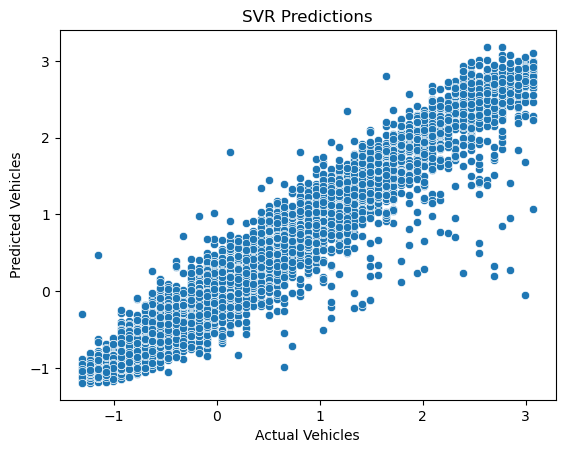

In [2]:

# using SVR model # Plot actual vs predicted values as a smooth line graph
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()

# Print the number of rows in the cleaned and transformed dataframe
print(df.shape[0])
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns


# Load the dataset
df = pd.read_csv(r'C:\Users\nh013\Desktop\traffic control.csv\traffic.csv')

# Feature selection
df = df[['DateTime','Junction','Vehicles','ID']]

# Identify missing values
print(df.isnull().sum())

# Drop rows with missing values
df.dropna(inplace=True)

# Fill missing values with mean or median
mean = df.mean()
df.fillna(mean, inplace=True)

# Fill missing values with mode
mode = df.mode().iloc[0]
df.fillna(mode, inplace=True)

# Fill missing values with forward fill
df.fillna(method='ffill', inplace=True)

# Fill missing values with backward fill
df.fillna(method='bfill', inplace=True)


# One-hot encode categorical variable 'Junction'
df = pd.get_dummies(df, columns=['Junction'])

# Handle outliers
df = handle_outliers(df, 'Vehicles')

# Add dynamic features
df['DateTime'] = pd.to_datetime(df['DateTime'])
df['year'] = df['DateTime'].dt.year
df['month'] = df['DateTime'].dt.month
df['day'] = df['DateTime'].dt.day
df['hour'] = df['DateTime'].dt.hour
df['minute'] = df['DateTime'].dt.minute
df['dayofweek'] = df['DateTime'].dt.dayofweek
df['lag1'] = df['Vehicles'].shift(1)
df['lag2'] = df['Vehicles'].shift(2)
df['lag3'] = df['Vehicles'].shift(3)

# Remove rows with missing values due to the lag features
df.dropna(inplace=True)

# Data transformation
scaler = MinMaxScaler()
df[['Vehicles', 'lag1', 'lag2', 'lag3']] = scaler.fit_transform(df[['Vehicles', 'lag1', 'lag2', 'lag3']])

# Normalize and scale all numerical columns
scaler = StandardScaler()
num_cols = df.select_dtypes(include='number').columns
df[num_cols] = scaler.fit_transform(df[num_cols])

# Split data into training and testing sets
X = df.drop(['DateTime', 'Vehicles'], axis=1)
y = df['Vehicles']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the SVR model
svr = SVR()
svr.fit(X_train, y_train)

# Predict the number of vehicles for test set
y_pred = svr.predict(X_test)

# Plot the predicted values against the actual values
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Vehicles')
plt.ylabel('Predicted Vehicles')
plt.title('SVR Predictions')
plt.show()
